# Code 4
- Numerical EDA
  - Basic Transforrmation
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [ ]:
#CodeSection1
from google.colab import drive
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [ ]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [ ]:
#CodeSection3
train = pd.read_csv('/mntDrive/MyDrive/__DataScience/1 Loan Prediction (Instructor Led)/1 Loan Prediction (Instructor Led)/input/train.csv')
test = pd.read_csv('/mntDrive/MyDrive/__DataScience/1 Loan Prediction (Instructor Led)/1 Loan Prediction (Instructor Led)/input/test.csv')

## 3/ Combine both Datasets (train, test)

In [ ]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [ ]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 4/ EDA - Check Numerical Variables

In [ ]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns


### Lets start with Numerical Variable/Feature - 1

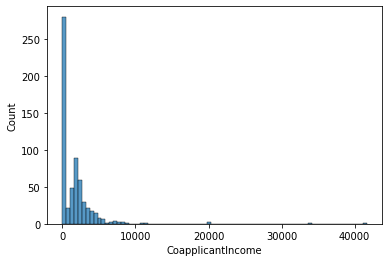

In [ ]:
#CodeSection8
# in this case we start with "ApplicantIncome"
# Use Histplot to check if its a normal distribution
sns.histplot(train['CoapplicantIncome'])
# Not Normal

In [ ]:
#Check other variables too and transform if needed

### Log Transformation
- Transform a Numerical Feature to Normal

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

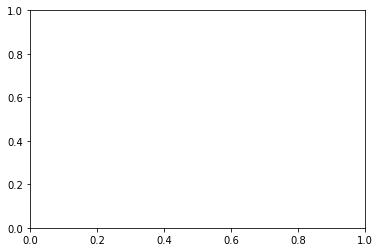

In [ ]:
#CodeSection9
# Use np.log to tranform make your feature normal
feature_normal = np.log(train['CoapplicantIncome']+1)

# Plot Normal Distribution
sns.histplot(feature_normal)

### Now lets Tranform One Variable/Feature

In [ ]:
#CodeSection10
# Write the Transformation Code
for datset in all_data:
  datset['ApplicantIncome'] = np.log(datset['ApplicantIncome']+1)


 # "1" is added to avoid error for rows that contain "0"


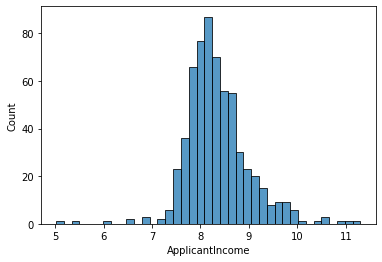

In [ ]:
#CodeSection11
# Lets check again
sns.histplot(train['ApplicantIncome'])
# Normal Distribution

### Replicate for other Numerical Variable/Features

In [ ]:
#CodeSection12

# Identify all other Numerical Variables 
numerical_features = ['CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Write a loop to do the same - use num_var
for num_var in numerical_features:
  for datset in all_data:
    datset[num_var] = np.log(datset[num_var]+1)

## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



In [ ]:
#CodeSection13
# Write a loop to Impute all Numerical Vairbales
for dataset in all_data:
  # Numerical Feature 1
  dataset['ApplicantIncome'] = dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].median())
  
  # Numerical Feature 2
  dataset['CoapplicantIncome'] = dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].median())

  # Numerical Feature 3
  dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
  
  # Numerical Feature 5
  dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median())

  # Numerical Feature 6
  dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].median())

## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

In [ ]:
#CodeSection14
for dataset in all_data:
  # Categorical Feature 1
  dataset['Gender'] = dataset['Gender'].fillna('Missing')

  # Categorical Feature 2
  dataset['Married'] = dataset['Married'].fillna('Missing')
  
  # Categorical Feature 3
  dataset['Dependents'] = dataset['Dependents'].fillna('Missing')

  # Categorical Feature 4
  dataset['Self_Employed'] = dataset['Self_Employed'].fillna('Missing')

## 7/ Now Re Check all Features

In [ ]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

## 8/ Prepare Data for Model Model

In [ ]:
#CodeSection16
# Check First 5 Rows of Test Data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,8.651899,0.000000,4.709530,5.888878,0.693147,Urban
1,LP001022,Male,Yes,1,Graduate,No,8.031710,7.313887,4.844187,5.888878,0.693147,Urban
2,LP001031,Male,Yes,2,Graduate,No,8.517393,7.496097,5.342334,5.888878,0.693147,Urban
3,LP001035,Male,Yes,2,Graduate,No,7.758333,7.842671,4.615121,5.888878,0.693147,Urban
4,LP001051,Male,No,0,Not Graduate,No,8.094684,0.000000,4.369448,5.888878,0.693147,Urban


In [ ]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['Loan_Status','Loan_ID'], axis =  1)
y = train['Loan_Status']

### Create Dummy Variables for  Categorical Variables

In [ ]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X,drop_first=True)  # Keep only n - 1 Variables - Use "drop_first = True"
X.shape
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Missing,Married_No,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Dependents_Missing,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.859812,5.888878,0.693147,1,0,1,0,0,0,0,0,0,1,0,0,1
1,8.430327,7.319202,4.859812,5.888878,0.693147,1,0,0,1,1,0,0,0,0,1,0,0,0
2,8.006701,0.000000,4.204693,5.888878,0.693147,1,0,0,1,0,0,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,5.888878,0.693147,1,0,0,1,0,0,0,0,1,1,0,0,1
4,8.699681,0.000000,4.955827,5.888878,0.693147,1,0,1,0,0,0,0,0,0,1,0,0,1


## 9/ Build Model

In [ ]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000)

In [ ]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [ ]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [ ]:
#CodeSection22
# Import metrics library
from sklearn.metrics import accuracy_score

In [ ]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['Loan_Status']

In [ ]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 80.9%


## 10/ Predict and Submit

### Predict

In [ ]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['Loan_ID'], axis =  1)

In [ ]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test,drop_first=True)
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Missing,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Dependents_Missing,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.651899,0.000000,4.709530,5.888878,0.693147,1,0,1,0,0,0,0,0,1,0,0,1
1,8.031710,7.313887,4.844187,5.888878,0.693147,1,0,1,1,0,0,0,0,1,0,0,1
2,8.517393,7.496097,5.342334,5.888878,0.693147,1,0,1,0,1,0,0,0,1,0,0,1
3,7.758333,7.842671,4.615121,5.888878,0.693147,1,0,1,0,1,0,0,0,1,0,0,1
4,8.094684,0.000000,4.369448,5.888878,0.693147,1,0,0,0,0,0,0,1,1,0,0,1


In [ ]:
X_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Gender_Missing',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Dependents_Missing', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
#CodeSection27
# use this code if the next Code shows error
X_test['Married_Missing']  = 0

X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [ ]:
#CodeSection29
sample_submission = pd.read_csv('/mntDrive/MyDrive/__DataScience/1 Loan Prediction (Instructor Led)/1 Loan Prediction (Instructor Led)/input/sample_submission.csv')
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


### Create Submission File

In [ ]:
#CodeSection30
submission = pd.DataFrame({
    'Loan_ID' : test['Loan_ID'],
    'Loan_Status' : X_test_prep
})

### Export Submission File

In [ ]:
#CodeSection31
submission.to_csv('/mntDrive/MyDrive/__DataScience/1 Loan Prediction (Instructor Led)/1 Loan Prediction (Instructor Led)/output/O4_Transformation_Strategy.csv', index = False)

In [ ]:
# LB Accuracy :0.763